Loading dataset...
Dataset loaded successfully.
Generating Visualization...


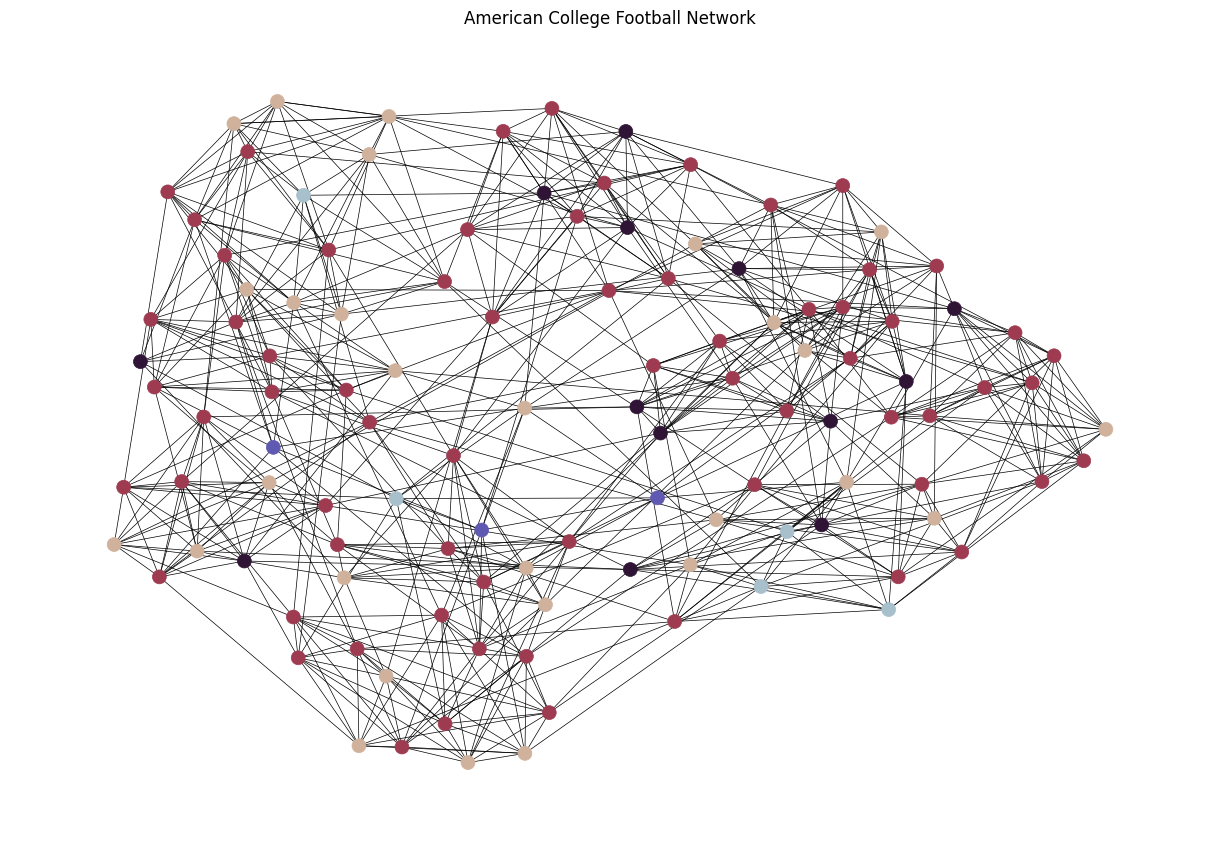


--- Graph Summary ---
Number of nodes : 115
Number of edges : 613
Maximum degree : 12
Minimum degree : 7
Average degree : 10.660869565217391
Median degree : 11.0

--- Graph Connectivity ---
Connected Components : 1

--- Graph Distance ---
Average Distance : 2.5081617086193746
Diameter : 4

--- Graph Clustering ---
Transitivity : 0.4072398190045249
Average Clustering Coefficient : 0.403216011042098


In [1]:
import urllib.request
import io
import zipfile
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# --- 1. Load the Football Dataset ---
print("Loading dataset...")
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

try:
    sock = urllib.request.urlopen(url)  # open URL
    s = io.BytesIO(sock.read())         # read into BytesIO "file"
    sock.close()
    
    zf = zipfile.ZipFile(s)             # zipfile object
    # The .gml file contains the graph structure
    gml = zf.read("football.gml").decode() 
    # Remove the first line if it causes parsing errors (common in mejn files)
    gml = gml.split("\n")[1:] 
    
    G = nx.parse_gml(gml) # parse gml data
    print("Dataset loaded successfully.")
    
except Exception as e:
    print(f"Error loading data from URL: {e}")
    print("Please check your internet connection or the URL.")
    # Fallback: Create a random graph if URL fails so you can still show code running
    G = nx.erdos_renyi_graph(115, 0.1)

# --- 2. Visualize the Graph ---
print("Generating Visualization...")
d = dict(G.degree)
low, *_, high = sorted(d.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.twilight_shifted)

plt.figure(figsize=(12, 8)) # Adjusted size for laptop screen
nx.draw(G, 
        nodelist=d, 
        node_size=100, 
        linewidths=0.5, 
        width=0.5,
        node_color=[mapper.to_rgba(i) for i in d.values()],
        with_labels=False)
plt.title("American College Football Network")
plt.show()

# --- 3. Define the Metrics Function ---
def GetGraphMetrics(graph):
    graph_degree = dict(graph.degree)
    
    print("\n--- Graph Summary ---")
    print(f"Number of nodes : {len(graph.nodes)}")
    print(f"Number of edges : {len(graph.edges)}")
    print(f"Maximum degree : {np.max(list(graph_degree.values()))}")
    print(f"Minimum degree : {np.min(list(graph_degree.values()))}")
    print(f"Average degree : {np.mean(list(graph_degree.values()))}")
    print(f"Median degree : {np.median(list(graph_degree.values()))}")
    
    print("\n--- Graph Connectivity ---")
    # Check if directed or undirected to use correct component function
    if nx.is_directed(graph):
        print(f"Strongly Connected Components : {nx.number_strongly_connected_components(graph)}")
        print(f"Weakly Connected Components : {nx.number_weakly_connected_components(graph)}")
    else:
        print(f"Connected Components : {nx.number_connected_components(graph)}")
        
    print("\n--- Graph Distance ---")
    if nx.is_connected(graph):
        print(f"Average Distance : {nx.average_shortest_path_length(graph)}")
        print(f"Diameter : {nx.algorithms.distance_measures.diameter(graph)}")
    else:
        print("Graph is not connected; cannot calculate average distance/diameter for the whole graph.")

    print("\n--- Graph Clustering ---")
    print(f"Transitivity : {nx.transitivity(graph)}")
    print(f"Average Clustering Coefficient : {nx.average_clustering(graph)}")

# --- 4. Run Metrics ---
GetGraphMetrics(G)